## 和弦图(Chord diagram)

- [bokeh库](https://docs.bokeh.org/en/latest/index.html)的[chord函数](https://docs.bokeh.org/en/0.12.5/docs/gallery/chord_chart.html) 不再维护

- [Plotly](https://plotly.com/python/v3/filled-chord-diagram/)：似乎也不好用

- [Chord](https://datacrayon.com/shop/product/chord-pro/)：收费

- 关于和弦图: [资料1](https://www.data-to-viz.com/graph/chord.html), [资料2](http://tuzhidian.com/chart?id=5c56e33d4a8c5e048189c6cb)

In [20]:
###################
# chord diagram
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

import numpy as np

LW = 0.3

def polar2xy(r, theta):
    return np.array([r*np.cos(theta), r*np.sin(theta)])

def hex2rgb(c):
    return tuple(int(c[i:i+2], 16)/256.0 for i in (1, 3 ,5))

def IdeogramArc(start=0, end=60, radius=1.0, width=0.2, ax=None, color=(1,0,0),alpha=0.5):
    # start, end should be in [0, 360)
    if start > end:
        start, end = end, start
    start *= np.pi/180.
    end *= np.pi/180.
    # optimal distance to the control points
    # https://stackoverflow.com/questions/1734745/how-to-create-circle-with-b%C3%A9zier-curves
    opt = 4./3. * np.tan((end-start)/ 4.) * radius
    inner = radius*(1-width)
    verts = [
        polar2xy(radius, start),
        polar2xy(radius, start) + polar2xy(opt, start+0.5*np.pi),
        polar2xy(radius, end) + polar2xy(opt, end-0.5*np.pi),
        polar2xy(radius, end),
        polar2xy(inner, end),
        polar2xy(inner, end) + polar2xy(opt*(1-width), end-0.5*np.pi),
        polar2xy(inner, start) + polar2xy(opt*(1-width), start+0.5*np.pi),
        polar2xy(inner, start),
        polar2xy(radius, start),
        ]

    codes = [Path.MOVETO,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.LINETO,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CLOSEPOLY,
             ]

    if ax == None:
        return verts, codes
    else:
        path = Path(verts, codes)
        patch = patches.PathPatch(path, facecolor=color, edgecolor='k', lw=LW)
        ax.add_patch(patch)
def ChordArc(start1=0, end1=60, start2=180, end2=240, radius=1.0, chordwidth=0.7, ax=None, color=(1,0,0),alpha=0.5):
    # start, end should be in [0, 360)
    if start1 > end1:
        start1, end1 = end1, start1
    if start2 > end2:
        start2, end2 = end2, start2
    start1 *= np.pi/180.
    end1 *= np.pi/180.
    start2 *= np.pi/180.
    end2 *= np.pi/180.
    opt1 = 4./3. * np.tan((end1-start1)/ 4.) * radius
    opt2 = 4./3. * np.tan((end2-start2)/ 4.) * radius
    rchord = radius * (1-chordwidth)
    verts = [
        polar2xy(radius, start1),
        polar2xy(radius, start1) + polar2xy(opt1, start1+0.5*np.pi),
        polar2xy(radius, end1) + polar2xy(opt1, end1-0.5*np.pi),
        polar2xy(radius, end1),
        polar2xy(rchord, end1),
        polar2xy(rchord, start2),
        polar2xy(radius, start2),
        polar2xy(radius, start2) + polar2xy(opt2, start2+0.5*np.pi),
        polar2xy(radius, end2) + polar2xy(opt2, end2-0.5*np.pi),
        polar2xy(radius, end2),
        polar2xy(rchord, end2),
        polar2xy(rchord, start1),
        polar2xy(radius, start1),
        ]

    codes = [Path.MOVETO,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             ]

    if ax == None:
        return verts, codes
    else:
        path = Path(verts, codes)
        patch = patches.PathPatch(path, facecolor=color, edgecolor=color,alpha=alpha, lw=LW)
        ax.add_patch(patch)
def selfChordArc(start=0, end=60, radius=1.0, chordwidth=0.7, ax=None, color=(1,0,0),alpha=0.5):
    # start, end should be in [0, 360)
    if start > end:
        start, end = end, start
    start *= np.pi/180.
    end *= np.pi/180.
    opt = 4./3. * np.tan((end-start)/ 4.) * radius
    rchord = radius * (1-chordwidth)
    verts = [
        polar2xy(radius, start),
        polar2xy(radius, start) + polar2xy(opt, start+0.5*np.pi),
        polar2xy(radius, end) + polar2xy(opt, end-0.5*np.pi),
        polar2xy(radius, end),
        polar2xy(rchord, end),
        polar2xy(rchord, start),
        polar2xy(radius, start),
        ]

    codes = [Path.MOVETO,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             ]

    if ax == None:
        return verts, codes
    else:
        path = Path(verts, codes)
        patch = patches.PathPatch(path, facecolor=color, edgecolor=color,alpha=alpha, lw=LW)
        ax.add_patch(patch)
def chordDiagram(X, ax, colors=None,cmap='viridis', width=0.1, pad=2, chordwidth=0.7,alpha=0.5,offset_label=0.95):
    """Plot a chord diagram

    Parameters
    ----------
    X :
        flux data, X[i, j] is the flux from i to j
    ax :
        matplotlib `axes` to show the plot
    colors : optional
        user defined colors in rgb format. Use function hex2rgb() to convert hex color to rgb color. Default: d3.js category10
    width : optional
        width/thickness of the ideogram arc
    pad : optional
        gap pad between two neighboring ideogram arcs, unit: degree, default: 2 degree
    chordwidth : optional
        position of the control points for the chords, controlling the shape of the chords
    """
    # X[i, j]:  i -> j
    x = X.sum(axis = 1) # sum over rows
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    if colors is None:
        if((type(plt.get_cmap(cmap))==type(plt.get_cmap('Set1')))):
            if(len(plt.get_cmap(cmap).colors)<10):
                colorList=plt.get_cmap(cmap).colors
                colors=[]
                for i in range(0,len(x)):
                    colors.append(colorList[i%len(colorList)])
            else:
                colors = plt.get_cmap(cmap)(np.linspace(0,1,len(x)))
        else:
            colors = plt.get_cmap(cmap)(np.linspace(0,1,len(x)))
        
    # find position for each start and end
    y = x/np.sum(x).astype(float) * (360 - pad*len(x))
    pos = {}
    arc = []
    nodePos = []
    start = 90
    for i in range(len(x)):
        end = start - y[i]
        arc.append((start, end))
        angle = 0.5*(start+end)
        #print(start, end, angle)
        #         if -30 <= angle <= 210:
        #             angle -= 90
        #         else:
        #             angle -= 270
        angle=angle-90 if(angle<180) else angle-90+180
        nodePos.append(tuple(polar2xy(offset_label, 0.5*(start+end)*np.pi/180.)) + (angle,))
        z = (X[i, :]/x[i].astype(float)) * (end - start)
        ids = np.argsort(z)
        z0 = start
        for j in ids:
            pos[(i, j)] = (z0, z0+z[j])
            z0 += z[j]
        start = end - pad

    for i in range(len(x)):
        start, end = arc[i]
        IdeogramArc(start=start, end=end, radius=1.0, ax=ax, color=colors[i], width=width)
        start, end = pos[(i,i)]
        selfChordArc(start, end, radius=1.-width, color=colors[i], chordwidth=chordwidth*0.7, ax=ax,alpha=alpha)
        for j in range(i):
            color = colors[i]
            if X[i, j] > X[j, i]:
                color = colors[j]
            start1, end1 = pos[(i,j)]
            start2, end2 = pos[(j,i)]
            ChordArc(start1, end1, start2, end2,
                     radius=1.-width, color=colors[i], chordwidth=chordwidth, ax=ax,alpha=alpha)

    #print(nodePos)
    return nodePos

(-1.1, 1.1, -1.1, 1.1)

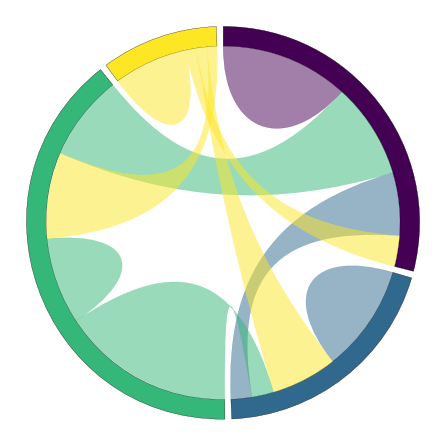

In [21]:
fig = plt.figure(figsize=(6,6))
flux = np.array([[11975,  5871, 8916, 2868],
  [ 1951, 10048, 2060, 6171],
  [ 8010, 16145, 8090, 8045],
  [ 1013,   990,  940, 6907]
])

ax = plt.axes([0,0,1,1])

#nodePos = chordDiagram(flux, ax, colors=[hex2rgb(x) for x in ['#666666', '#66ff66', '#ff6666', '#6666ff']])
nodePos = chordDiagram(flux, ax)
ax.axis('off')
# prop = dict(fontsize=16*0.8, ha='center', va='center')
# nodes = ['non-crystal', 'FCC', 'HCP', 'BCC']
# for i in range(4):
#     ax.text(nodePos[i][0], nodePos[i][1], nodes[i], rotation=nodePos[i][2], **prop)

# plt.savefig("example.png", dpi=600,
#         transparent=True,
#         bbox_inches='tight', pad_inches=0.02)

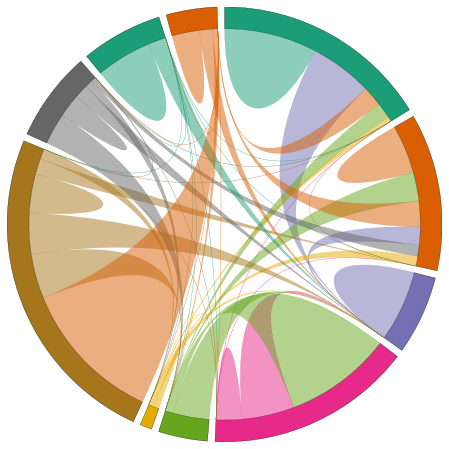

In [36]:
data=pd.read_csv('Data/chord/data.csv')
data=data.set_index('Unnamed: 0')
del data.index.name


fig=plt.figure(figsize=(8,8))
ax=plt.gca()
ax.axis('scaled')
chordDiagram(data.values, ax=ax, cmap='Dark2')
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.axis('off')
plt.show()